In [23]:

# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob
import calendar
import datetime as dt

#from learntools.time_series.style import * 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

from mlxtend.preprocessing import minmax_scaling

ModuleNotFoundError: No module named 'xgboost'

In [25]:
macroECO_data=pd.read_excel("../data/raw_data/macro_economic.xlsx")

In [26]:
events_Holidays_data= pd.read_excel("../data/raw_data/Events_HolidaysData.xlsx")


In [27]:
weather_data = pd.read_excel("../data/raw_data/WeatherData.xlsx")


In [28]:
train_data = pd.read_csv("../data/raw_data/train.csv")


In [29]:
attributes_description = pd.read_excel("../data/raw_data/attributes_description.xlsx")

Train Data Overview:
   Year  Month ProductCategory  Sales(In ThousandDollars)
0  2009      1   WomenClothing                     1755.0
1  2009      1     MenClothing                      524.0
2  2009      1   OtherClothing                      936.0
3  2009      2   WomenClothing                     1729.0
4  2009      2     MenClothing                      496.0


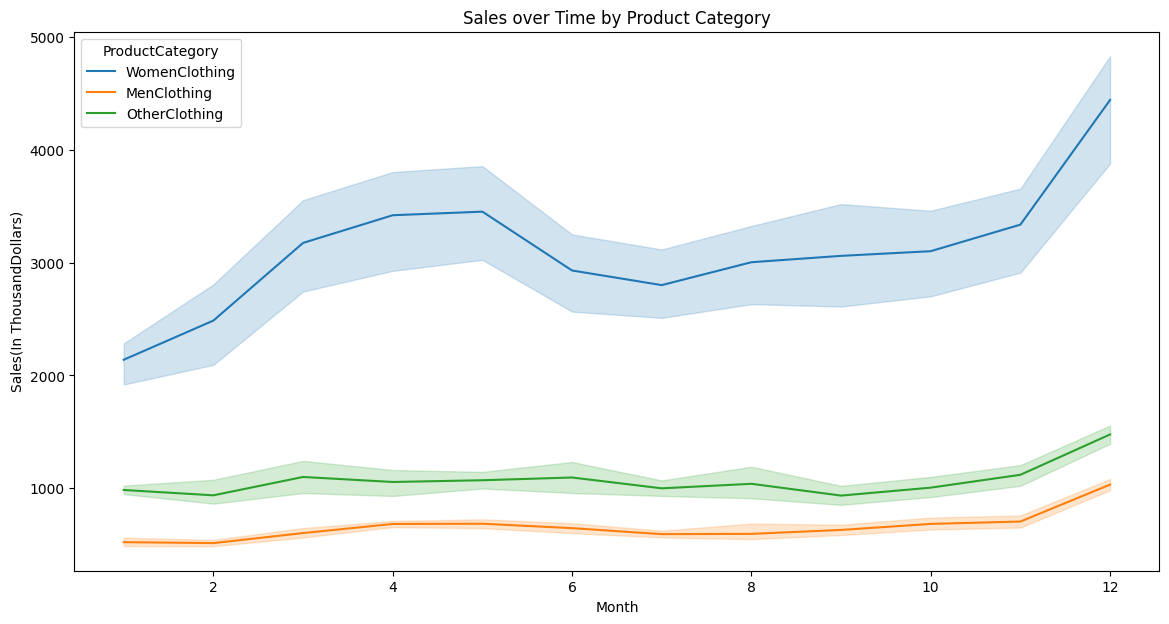

In [32]:


# Load datasets
macro_data = pd.read_csv("../data/processed_data/macro_economic.csv")
events_Holidays_data = pd.read_csv("../data/processed_data/events_Holidays_data.csv")
weather_data = pd.read_csv("../data/processed_data/weather_data.csv")
train_data = pd.read_csv("../data/processed_data/train.csv")

# Exploratory Data Analysis (EDA)
print("Train Data Overview:")
print(train_data.head())

# Visualize sales over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=train_data, x='Month', y='Sales(In ThousandDollars)', hue='ProductCategory')
plt.title('Sales over Time by Product Category')
plt.show()


In [8]:
attributes_description.head()

,AttributeName,Type,Description
0,Year,temporal,Year
1,Month,temporal,Month
2,ProductCategory,categorical,"Clothing Products category - WomenClothing, Me..."
3,Sales(In ThousandDollars),numeric,Value of the sales or revenue in thousand dollars


In [10]:
macro_data.head()

,Year-Month,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,PartyInPower,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,AdvertisingExpenses (in Thousand Dollars),Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports
0,2009 - Jan,14421.752895,14407.053343,233.402,Democrats,7.8,12.03,11.44,22.05,137,57.70,4.02,9.296,7.559,799,12.589,4.17,11.550
1,2009 - Feb,14389.200466,14366.176571,234.663,Democrats,8.3,12.97,11.05,22.22,200,55.21,-4.32,9.296,7.559,799,12.589,3.87,11.100
2,2009 - Mar,14340.701639,14351.786822,235.067,Democrats,8.7,12.97,11.05,22.22,?,51.50,-6.72,9.296,7.559,799,12.589,3.72,11.650
3,2009 - Apr,14326.815525,14351.601731,235.582,Democrats,9.0,12.97,11.05,22.13,214,56.78,10.25,9.296,7.559,787,12.400,3.62,12.225
4,2009 - May,14345.904809,14368.123959,235.975,Democrats,9.4,13.32,11.25,22.04,?,61.95,9.11,9.297,7.400,803,12.384,3.52,12.300
